In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import PowerTransformer

import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder # import


import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\hites\Downloads\loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA) 

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

As we can observe that Dataset doesnot not contails any duplicate values. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can observbe that the dataset have 614 rows and 13 columns including target variable.

"Loan_Status" is a target variable that is categorical and has an object datatype.

Gender, Married, Education, Self Employed, Credit History, Loan Status are Categorical features.

Int64(1), object(8), and float64(4) are the three types of dtypes.

# Checking the Null values. 

Lets visualize it by using heatmap

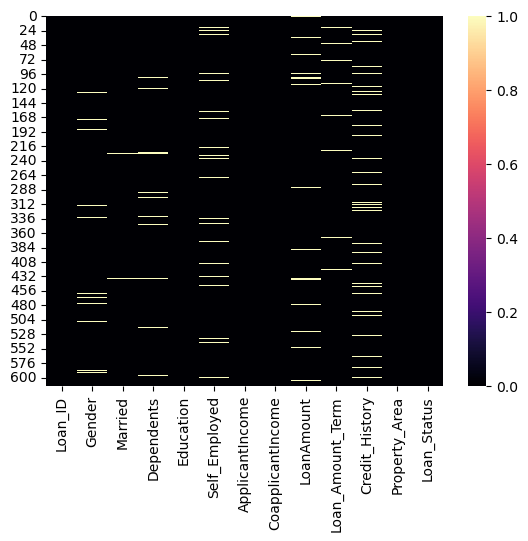

In [8]:
sns.heatmap(df.isnull(), cmap='magma')  
plt.show()

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observation:
    
    7 out 13 columns having a missing values.
    

In [10]:
#Checking the total value count of each columns.

for i in df.columns:
    value_counts = df[i].value_counts()  
    print(f"Value counts for {i}:\n{value_counts}\n")
    

Value counts for Loan_ID:
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Value counts for Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Value counts for Married:
Yes    398
No     213
Name: Married, dtype: int64

Value counts for Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Value counts for Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Value counts for Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

Value counts for ApplicantIncome:
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

Value counts for CoapplicantIncome:
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
101

Checking number of unique values in each column.

In [11]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


From the Above Observations we can determine as small amount of data is missing so we use mean amd mode to replace with NaN values.
[Gender, married, Dependents, Self_empleoyeed,Credit_History,Loan_Amount_Term] is repalce with mode.

Credit History, Self Employed, dependents, Gender and Married are replace with mode of repective features.

Missing values in the Loan amount are filled up using the median value.

# Filling Missing values


In [12]:
# For categorical features

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

# For of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

So finally there io missing values are present in the dataset.

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observations : 
    
We can observe that all columns having count 614.000000
           
The standard deviation number in Applicant Income and Coapplicant Income is larger than the median. As a result, data is dispersed and skewed.
        
There is a significant gap between 75%ile and Max, allowing us to definitely say that outliers exist in Applicant Income, Coapplicant Income, and Loan Amount.

# Dropping the unnecessary Columns because their no contribution in the dataset

Observation:

In the context of building a machine learning model for predicting loan approval status, the Loan_ID column is generally not considered necessary for training the model. Loan_ID is typically used as a unique identifier for each loan application but does not provide meaningful information that can contribute to the prediction of loan approval.

In [15]:
df = df.drop(['Loan_ID'], axis=1)

In [16]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Univariate Analysis

Seperating Numerical and Categorial data

In [17]:
categorial_col = []
for i in df.dtypes.index:
    if df.dtypes[i]  == "object":
        categorial_col.append(i)
print("Categorial Columns: " , categorial_col)  
print("\n")



numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns: " , numerical_col)

Categorial Columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical Columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


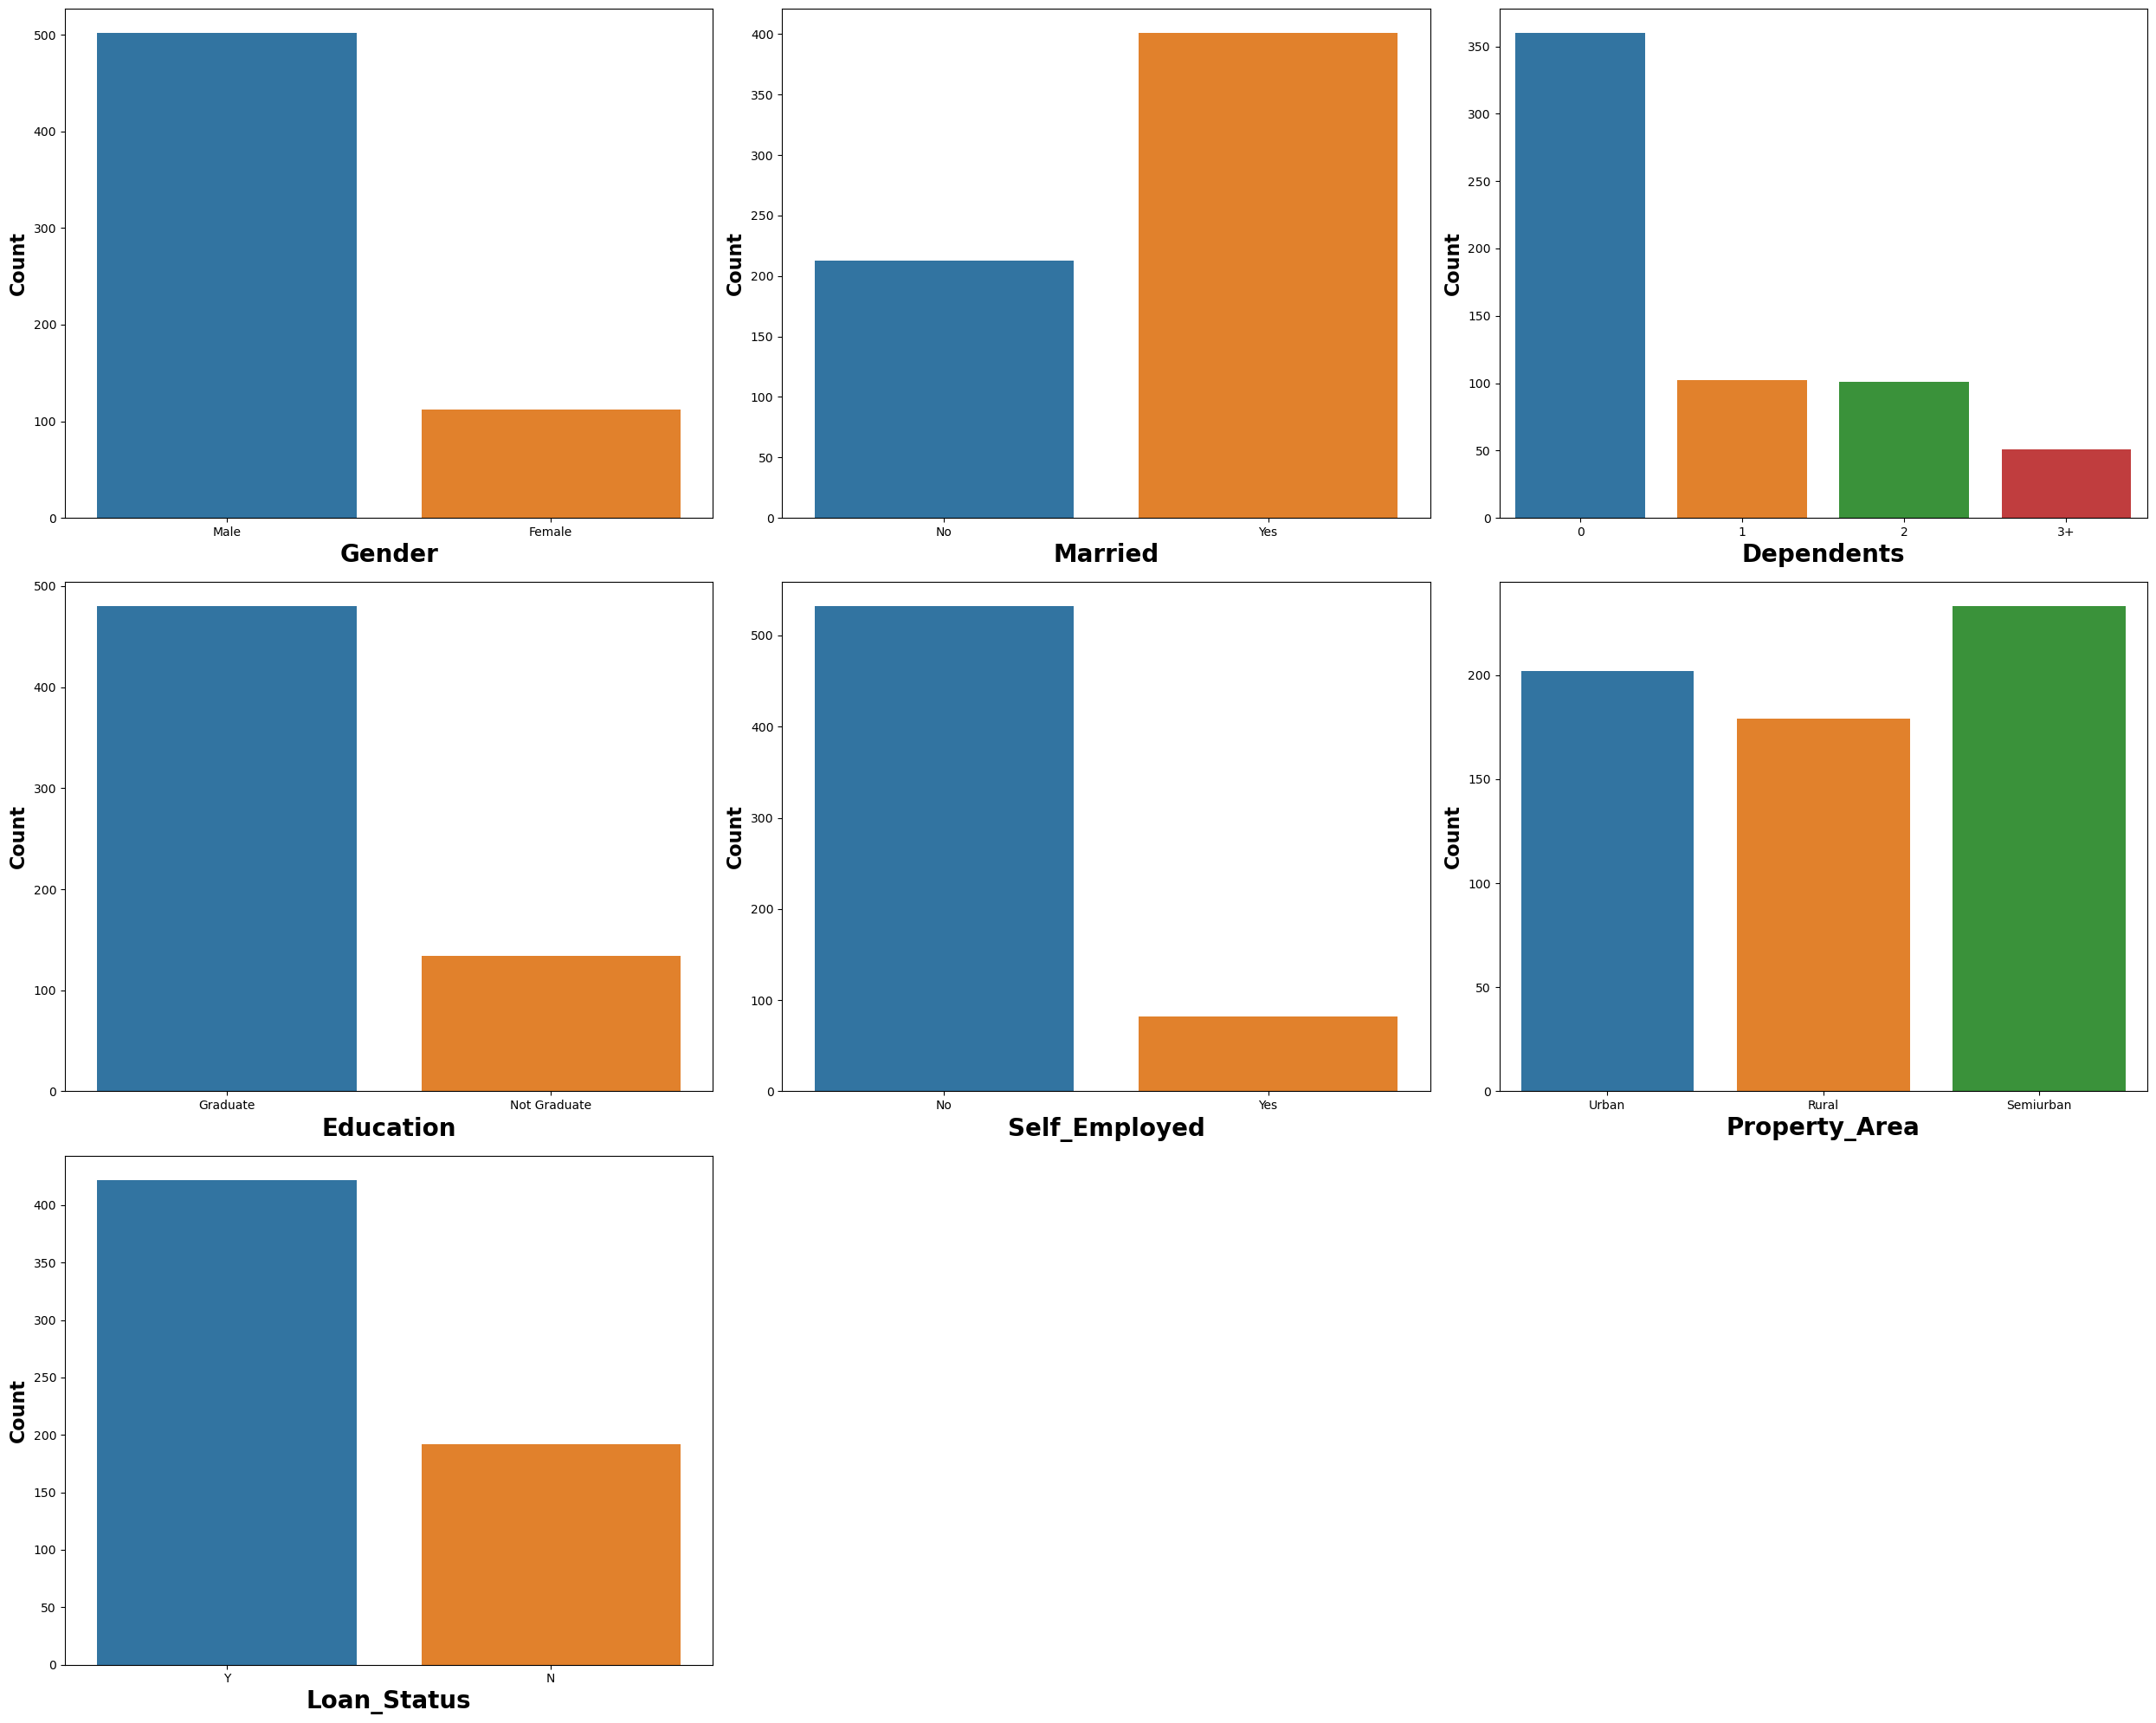

In [18]:
plt.figure(figsize=(25,20),facecolor='white')
plotnumber=1
for i in categorial_col:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20,fontweight='bold')
        plt.ylabel('Count', fontsize=16, fontweight='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

Observations:

As we can observe that from the above count plot of the categorial columns Out of Total loan application more than 80 % applicants are Male.
            
Almost 70% applicants are married.
            
Almost 60% of the applicants have no dependents.
            
Almost 75% of loan applicants are graduates.
            
Only 20% of applicants are self employed. Therefore, learning more about the relationship between applicant income and loan approval for the non-self employed category will be interesting. In order to approve loans, we will search for any benchmark range of income. We'll also look for a benchmark regarding the loan requirements for these two groups.
            
The majority of applicants are from semi-urban areas, with urban and rural areas following.

Almost 69% Applicants gets loan Approval.
We can observe that the dataset is unbalanced.

In [19]:
#Count plot for the numerical data 

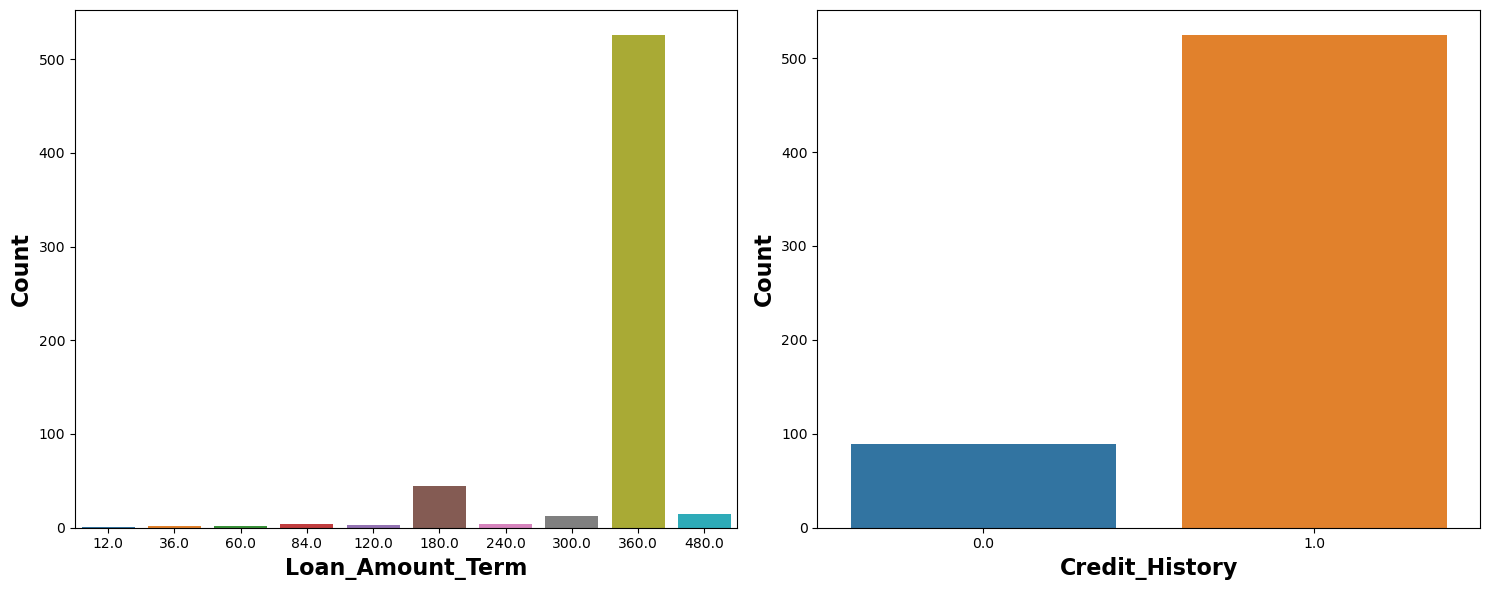

In [20]:
plt.figure(figsize=(15, 6), facecolor='white')
plotnumber = 1

# Specify the numerical columns of interest
selected_numerical_cols = ['Loan_Amount_Term', 'Credit_History']
plotnumber=1
for i in selected_numerical_cols:
    ax = plt.subplot(1, 2, plotnumber)
    sns.countplot(df[i])
    plt.xlabel(i, fontsize=16, fontweight='bold')
    plt.ylabel('Count', fontsize=16, fontweight='bold')
    plotnumber += 1

plt.tight_layout()
plt.show()


Observations:                
             
 As we can see that almost 85% applicants are applied for 30-year loan term.
        
        
 80% of people have past credit history. People with credit histories are typically thought to be more likely to be approved for loans.

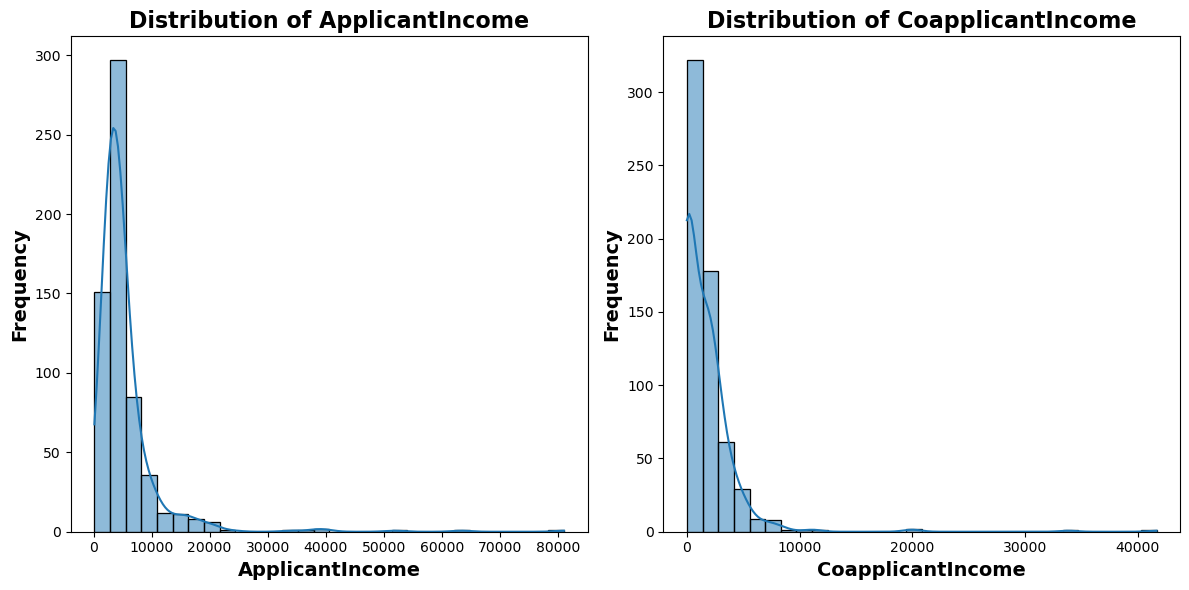

In [21]:
plt.figure(figsize=(12, 6))
selected_numerical_cols = ['ApplicantIncome', 'CoapplicantIncome']
plotnumber = 1
for i in selected_numerical_cols:
    if plotnumber <= 2:
        plt.subplot(1, 2, plotnumber)
        sns.histplot(df[i], bins=30, kde=True)
        plt.title(f'Distribution of {i}', fontsize=16, fontweight='bold')
        plt.xlabel(i, fontsize=14, fontweight='bold')
        plt.ylabel('Frequency', fontsize=14, fontweight='bold')
        plotnumber += 1

plt.tight_layout()
plt.show()

Observations:

As we can see that almost 90% applicants have income between 0 to 10000.however the majority of them fall between 0 and 5000.

96% of CoapplicantIncome have income between 0 to 5000.however the majority of them have no income or between 0 to 4000.

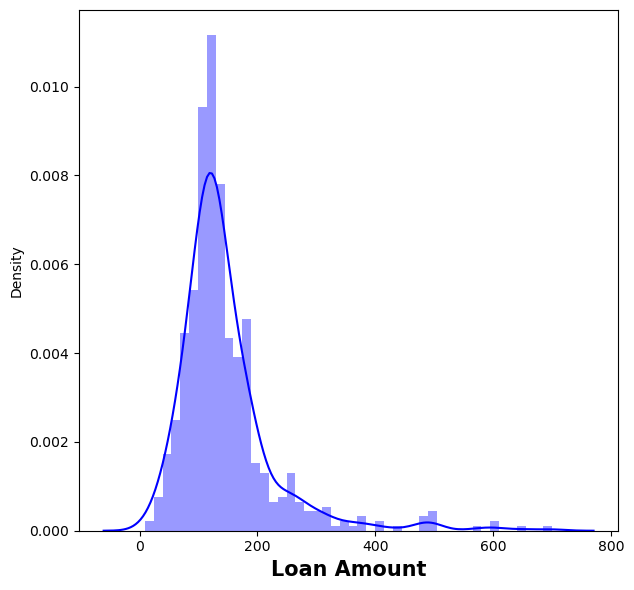

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15,fontweight='bold')
plt.tight_layout()
plt.show()

As we can see from the normal distribution, the majority of applicants apply for loans ranging from 0 to 200.We can plainly see the skewness on the right side, and we will go over it in further depth in the box plot.

# Biverate Analysis

To obtain insight into the data, compare each feature to the Target variable.

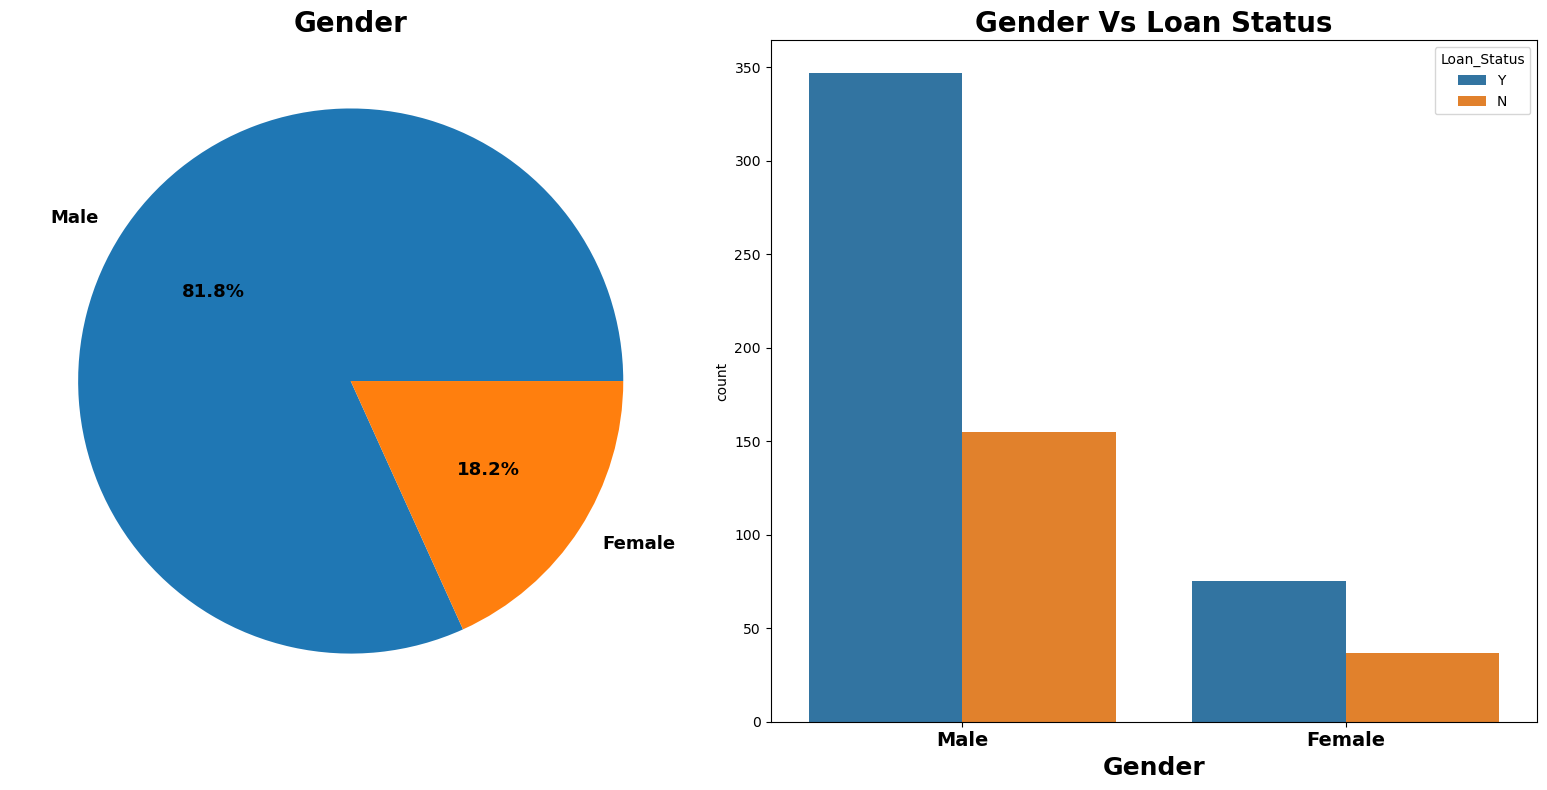

In [23]:
#Gender Vs Loan_Status

plt.rcParams["figure.autolayout"] = True

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 'Gender' distribution
df['Gender'].value_counts().plot.pie(autopct='%2.1f%%', textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0])
ax[0].set_title('Gender', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for 'Gender' vs 'Loan_Status'
sns.countplot('Gender', hue="Loan_Status", data=df, ax=ax[1])
ax[1].set_title('Gender Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Gender", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [24]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


Observation:
    
81.8% of loan Applicant are male.
Regardless of Gender A loan is approved for 65% of applicants from each gender. It signifies that gender has no bearing on loan acceptance. There was no gender discrimination.

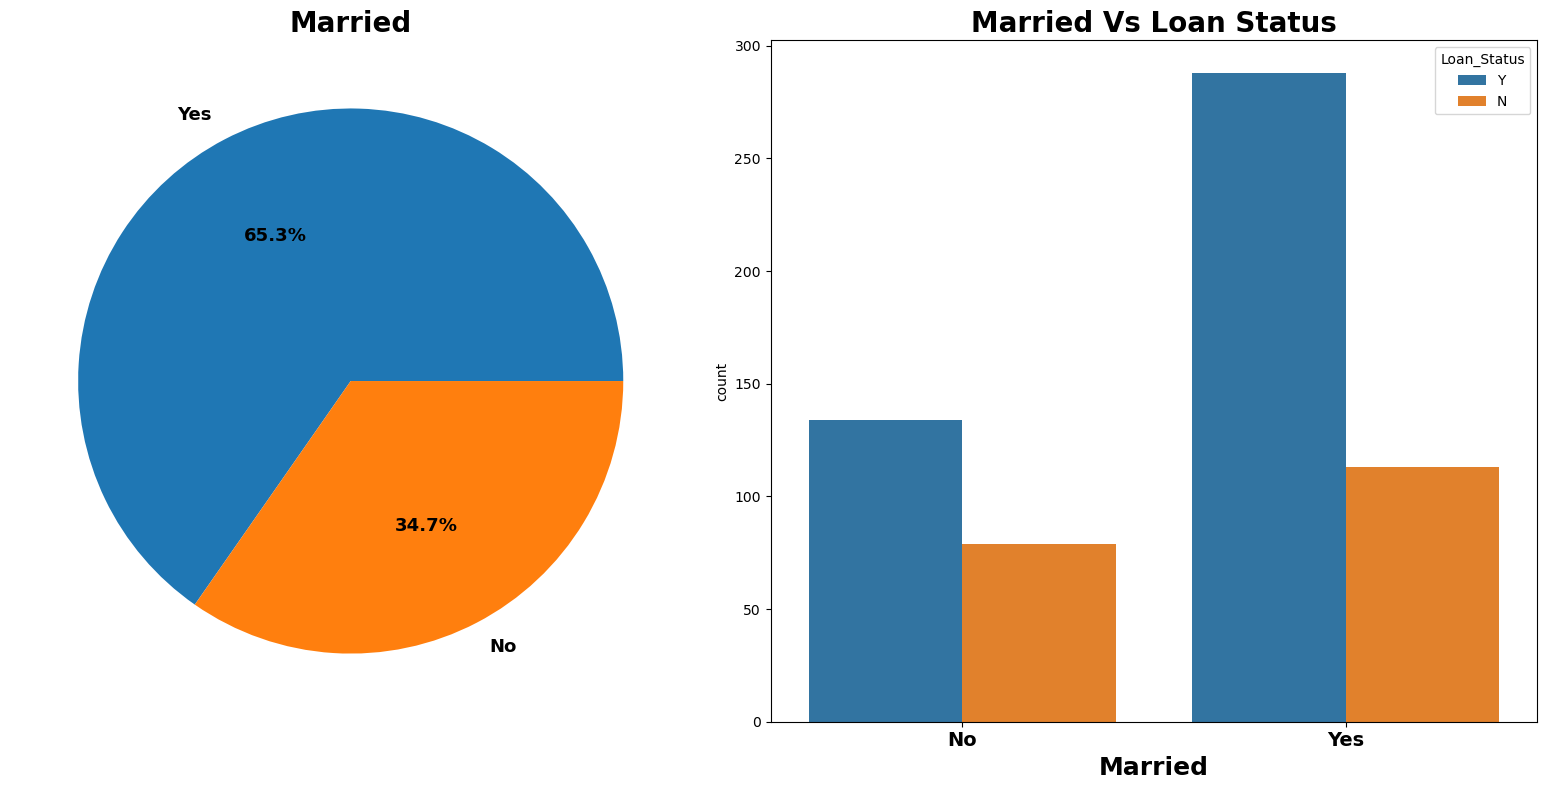

In [25]:
#Married Vs Loan_Status

plt.rcParams["figure.autolayout"] = True

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 'Married' distribution
df['Married'].value_counts().plot.pie(autopct='%2.1f%%', textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0])
ax[0].set_title('Married', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for 'Married' vs 'Loan_Status'
sns.countplot('Married', hue="Loan_Status", data=df, ax=ax[1])
ax[1].set_title('Married Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Married", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [26]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True)

Loan_Status       N    Y  All
Gender Married               
Female No        29   51   80
       Yes        8   24   32
Male   No        50   83  133
       Yes      105  264  369
All             192  422  614

Observation:
    
65.3% of loan applicants are married. According to the Count plot, married persons have a better chance of obtaining a loan approved.

Married Men are more chances of loan approval.

From the crosstab we can observe a very interesting thing Unmarried Women are more chances of getting loan approval compare to married women.


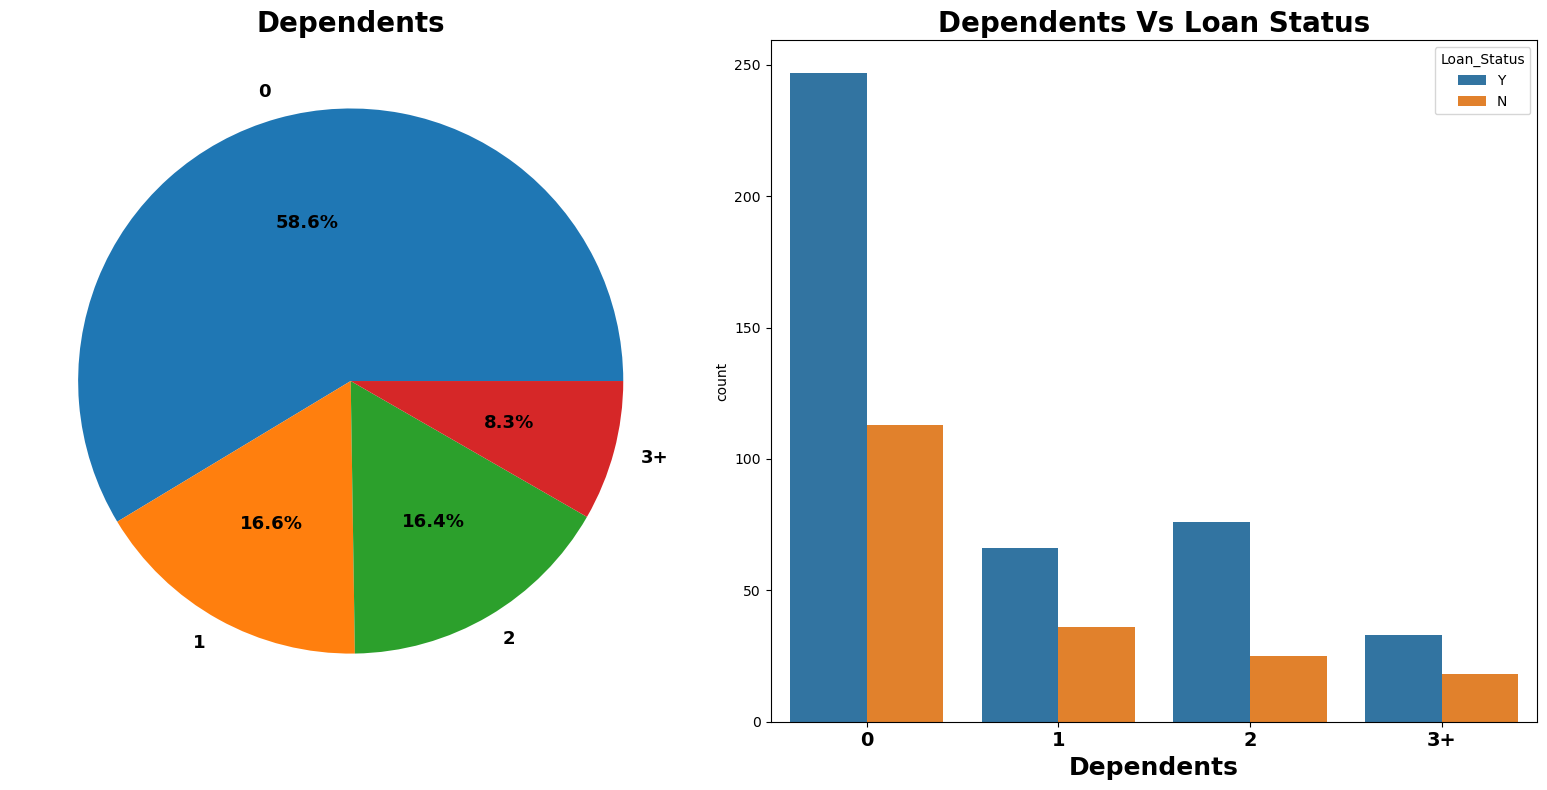

In [27]:
#Dependents vs Loan_Status

plt.rcParams["figure.autolayout"] = True

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 'Dependents' distribution
df['Dependents'].value_counts().plot.pie(autopct='%2.1f%%', textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0])
ax[0].set_title('Dependents', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for 'Dependents' vs 'Loan_Status'
sns.countplot('Dependents', hue="Loan_Status", data=df, ax=ax[1])
ax[1].set_title('Dependents Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Dependents", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [28]:
pd.crosstab([df['Dependents'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status          N    Y  All
Dependents Gender               
0          Female   27   56   83
           Male     86  191  277
1          Female    6   13   19
           Male     30   53   83
2          Female    2    5    7
           Male     23   71   94
3+         Female    2    1    3
           Male     16   32   48
All                192  422  614

Observation:

From the above observation 58.6% of applicants had no dependents.33% of applicants have 1 or 2 dependents.

Females with no dependents have a better likelihood of loan acceptance.

Maximum loan approval for males occurs with 0 dependents, followed by 2 dependents.
    

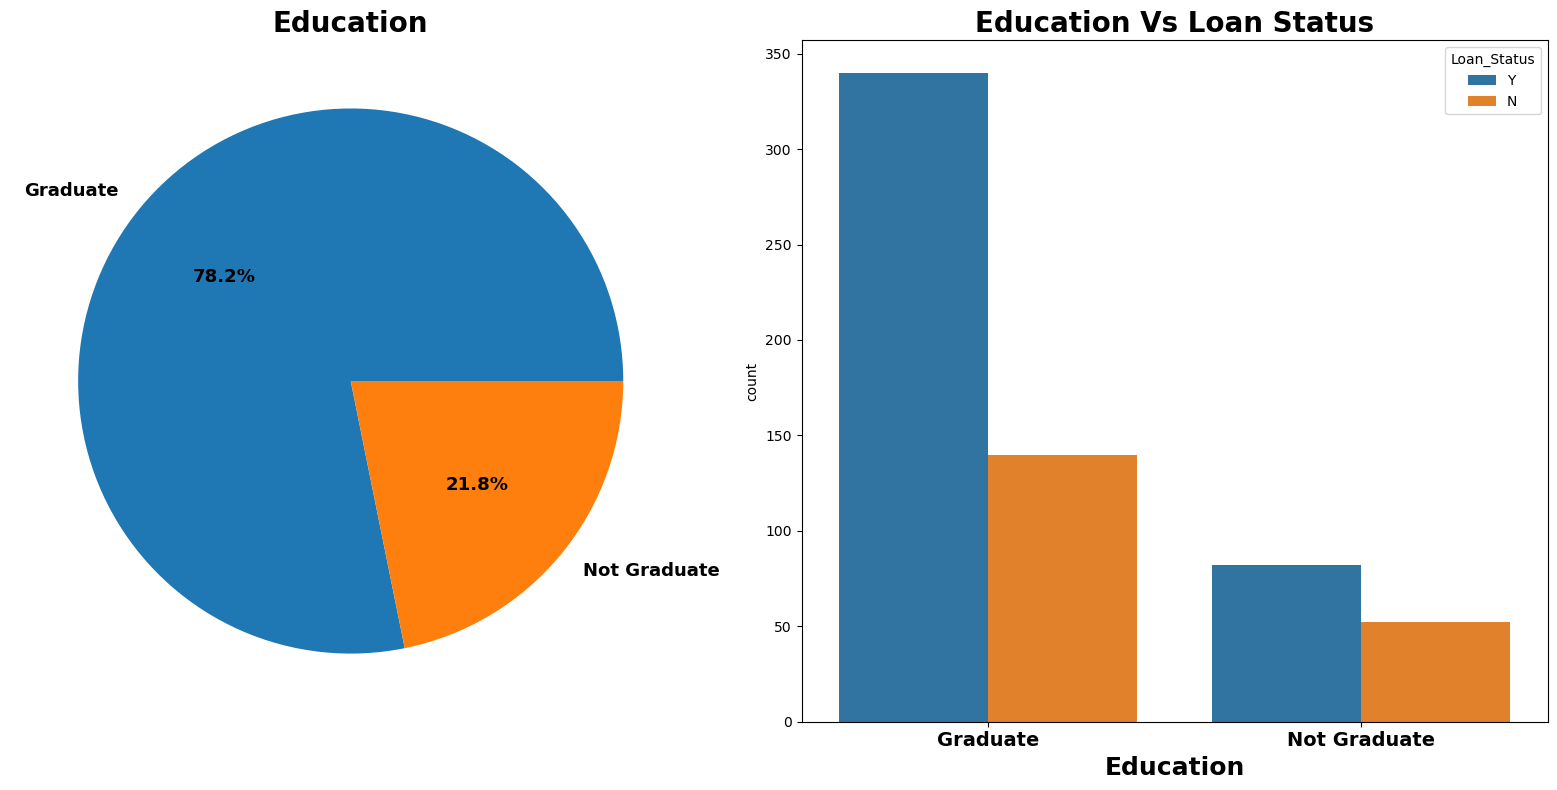

In [29]:
#Education Vs Loan status

plt.rcParams["figure.autolayout"] = True

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 'Education' distribution
df['Education'].value_counts().plot.pie(autopct='%2.1f%%', textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0])
ax[0].set_title('Education', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for 'Education' vs 'Loan_Status'
sns.countplot('Education', hue="Loan_Status", data=df, ax=ax[1])
ax[1].set_title('Education Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Education", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [30]:
pd.crosstab([df['Education'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status            N    Y  All
Education    Gender               
Graduate     Female   31   61   92
             Male    109  279  388
Not Graduate Female    6   14   20
             Male     46   68  114
All                  192  422  614

Observation:
    
From the above obserevation 78.2% are graduate applicants.

Graduate candidates, regardless of gender, are more likely to be approved for a loan.

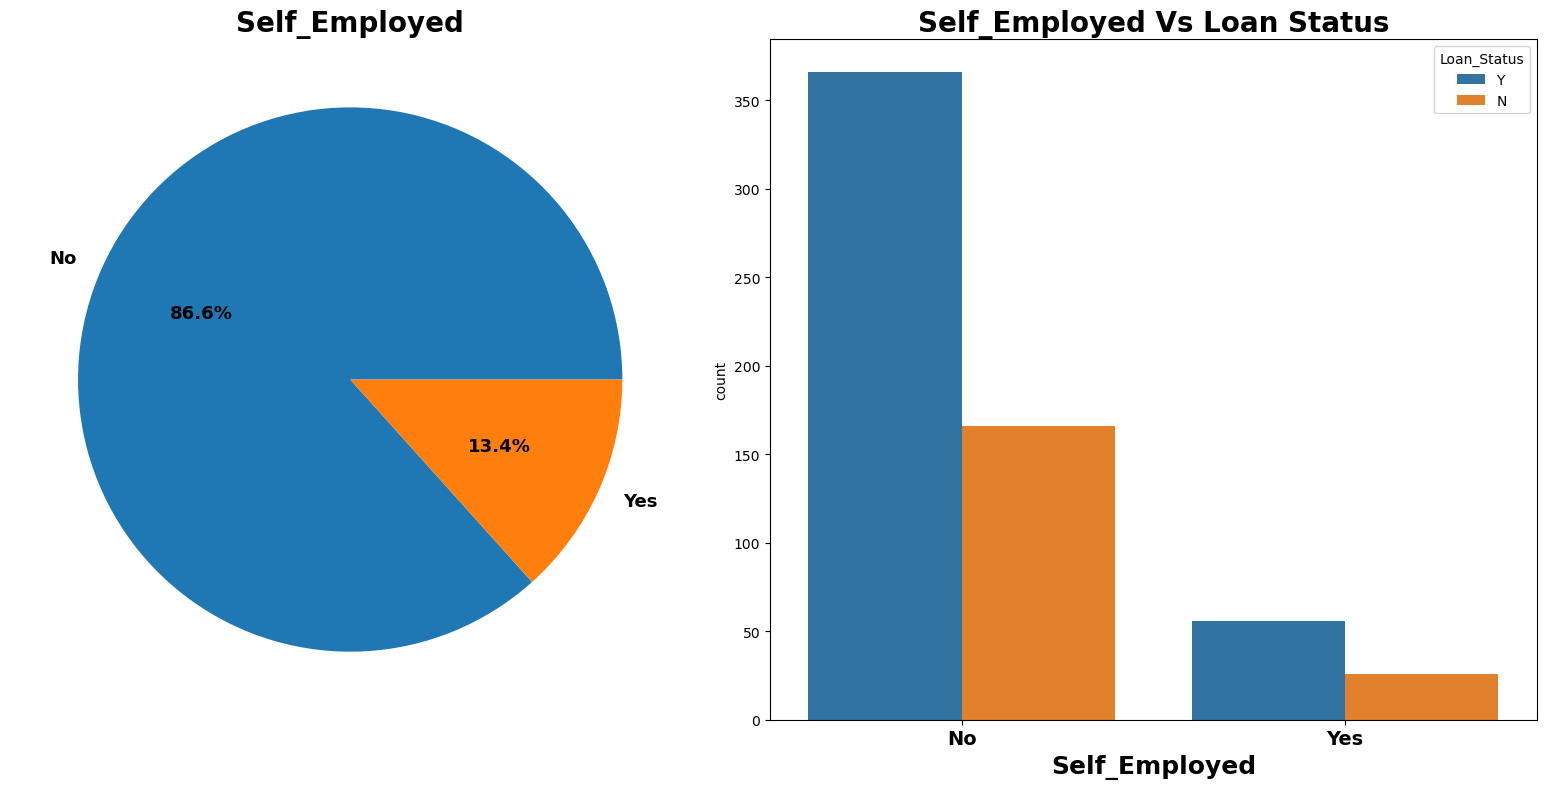

In [31]:
plt.rcParams["figure.autolayout"] = True

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 'Self_Employed' distribution
df['Self_Employed'].value_counts().plot.pie(autopct='%2.1f%%', textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0])
ax[0].set_title('Self_Employed', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for 'Self_Employed' vs 'Loan_Status'
sns.countplot('Self_Employed', hue="Loan_Status", data=df, ax=ax[1])
ax[1].set_title('Self_Employed Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Self_Employed", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [32]:
pd.crosstab([df['Self_Employed'],df['Gender']],[df.Loan_Status],margins=True)

Loan_Status             N    Y  All
Self_Employed Gender               
No            Female   31   66   97
              Male    135  300  435
Yes           Female    6    9   15
              Male     20   47   67
All                   192  422  614

Observation:
    
From the above obserevation only 13.4% are self employeed applicants.

self employeed male are more likely to be approved for a loan as compare to female.

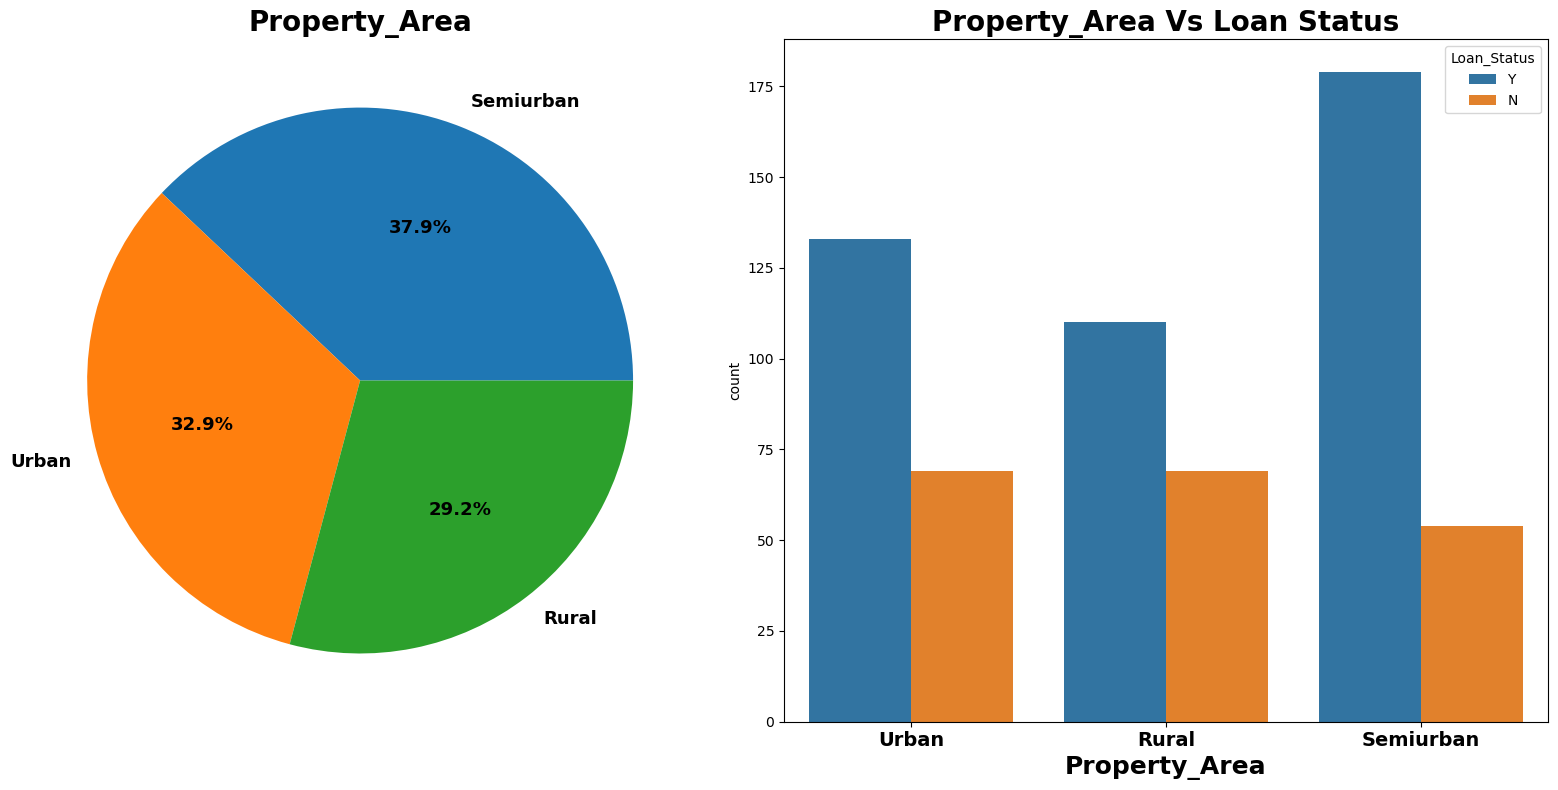

In [33]:
plt.rcParams["figure.autolayout"] = True

figure, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 'Property_Area' distribution
df['Property_Area'].value_counts().plot.pie(autopct='%2.1f%%', textprops={'fontweight': 'bold', 'fontsize': 13}, ax=ax[0])
ax[0].set_title('Property_Area', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for 'Property_Area' vs 'Loan_Status'
sns.countplot('Property_Area', hue="Loan_Status", data=df, ax=ax[1])
ax[1].set_title('Property_Area Vs Loan Status', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Property_Area", fontsize=18, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Observation:

From the above observation 37.9% applicants are from semiurban propety _area, alongwith Urban 32.9 and Rular 29.2

Semiurban property areas have received more loans than other areas.

# Encoding categorical data

In [34]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']



In [35]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


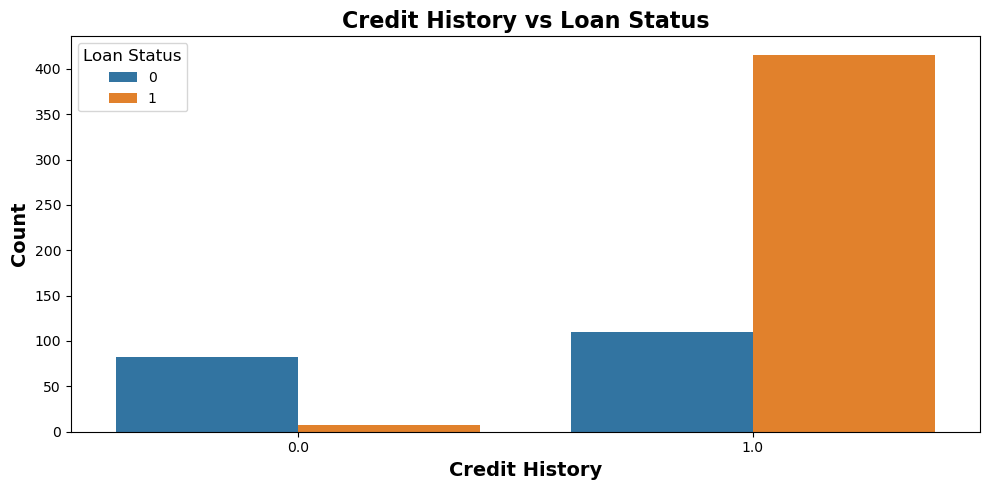

In [36]:
#Credit History vs Loan Status

plt.figure(figsize=(10, 5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

plt.title('Credit History vs Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Credit History', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Loan Status', title_fontsize='12', fontsize='10', loc='upper left')

plt.show()

From the above Observation we may conclude that the majority of persons who do not receive approval do not have a credit history.
Those with a credit history are more likely to get approved.

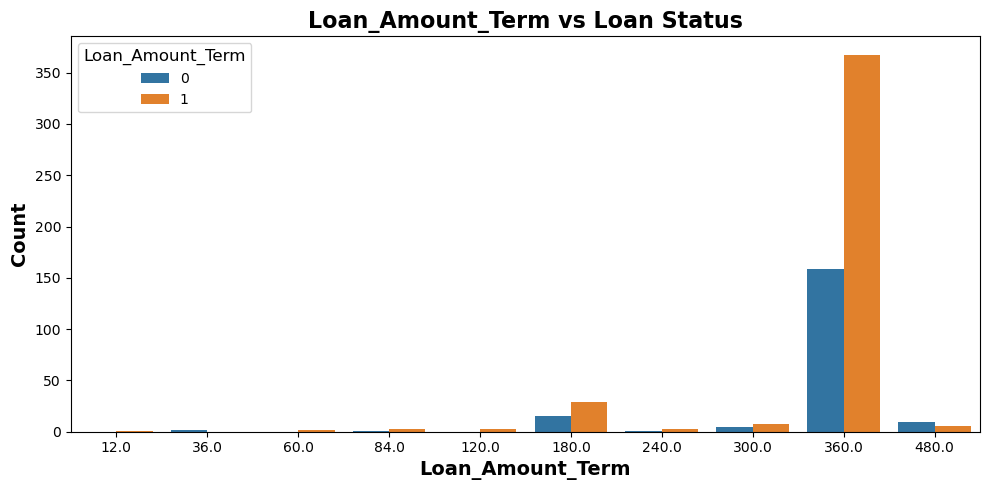

In [37]:
#Credit History vs Loan Status

plt.figure(figsize=(10, 5))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=df)

plt.title('Loan_Amount_Term vs Loan Status', fontsize=16, fontweight='bold')
plt.xlabel('Loan_Amount_Term', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Loan_Amount_Term', title_fontsize='12', fontsize='10', loc='upper left')

plt.show()

The majority of persons who sought for loans requested 360-month terms, and more than half of them were accepted.

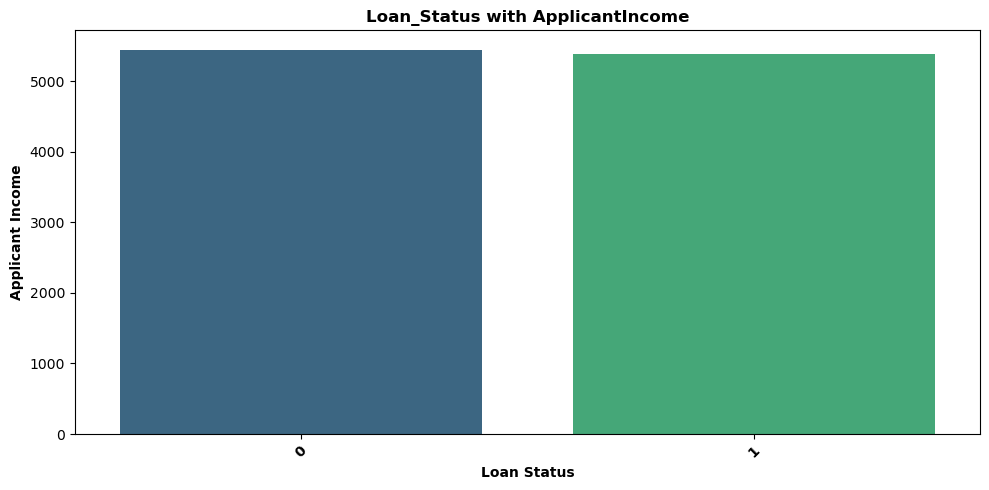

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=df, palette='viridis', ci=None)
plt.title("Loan_Status with ApplicantIncome", fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.ylabel('Applicant Income', fontweight='bold')
plt.xlabel('Loan Status', fontweight='bold')

plt.show()

Chances are equal. With ApplicantIncome, It makes no difference.

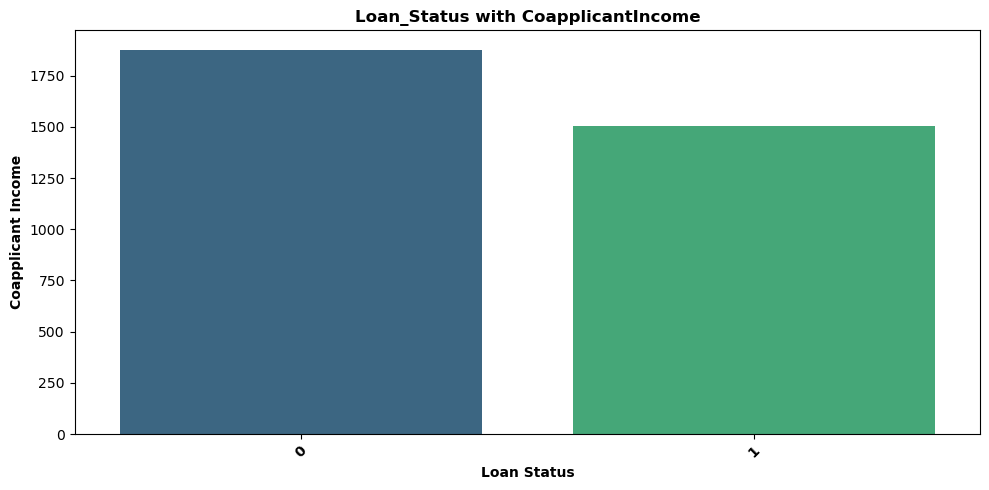

In [39]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Loan_Status', y='CoapplicantIncome', data=df, palette='viridis', ci=None)
plt.title("Loan_Status with CoapplicantIncome", fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.ylabel('Coapplicant Income', fontweight='bold')
plt.xlabel('Loan Status', fontweight='bold')

plt.show()


Here are some noteworthy statistics: it may not matter if the applicant's income is large; approval is contingent upon meeting all other requirements.

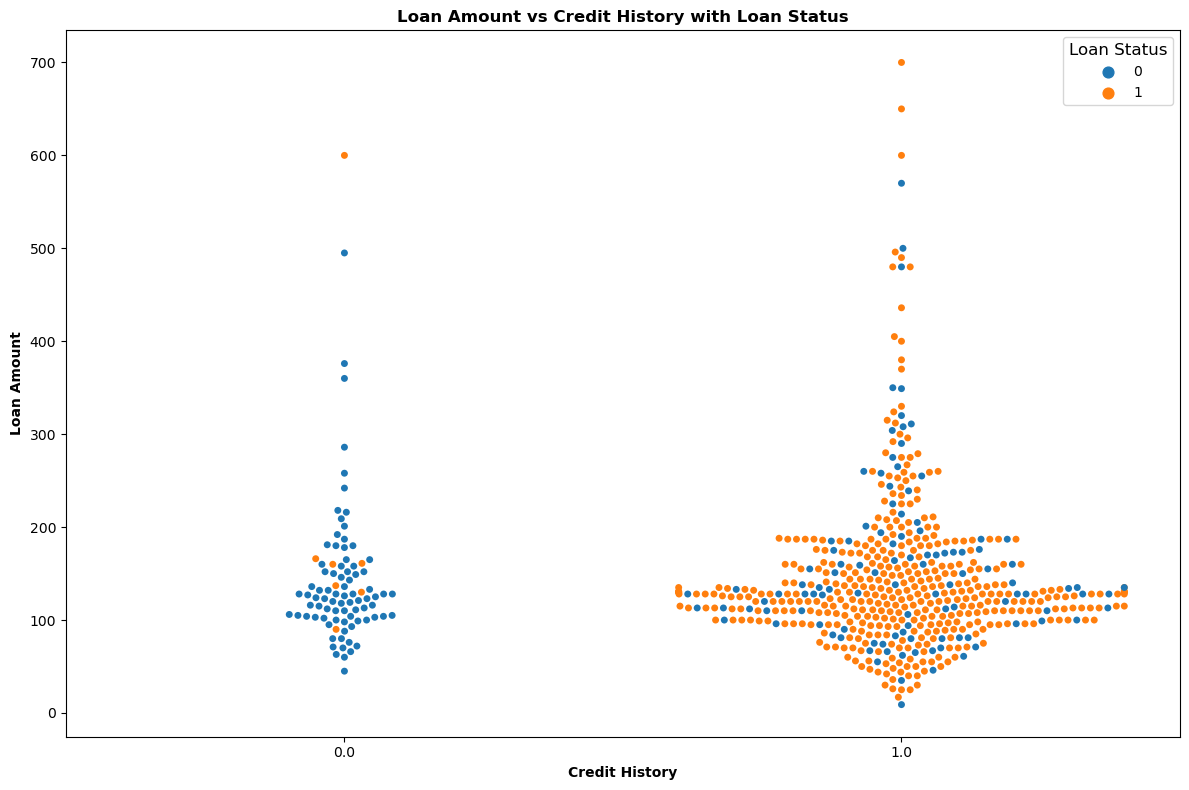

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Credit_History', y='LoanAmount', hue='Loan_Status', data=df)
plt.title('Loan Amount vs Credit History with Loan Status',fontweight='bold')
plt.xlabel('Credit History', fontweight='bold')
plt.ylabel('Loan Amount', fontweight='bold')
plt.legend(title='Loan Status', title_fontsize='12', fontsize='10', loc='upper right')
plt.show()


From the above observartion we can clearly observe thatloan amounts ranging from 50 to 200 and those with a past credit history have a higher chance of loan acceptance as compare to the no credit history.

# Outliers Detection and Removal

In [41]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

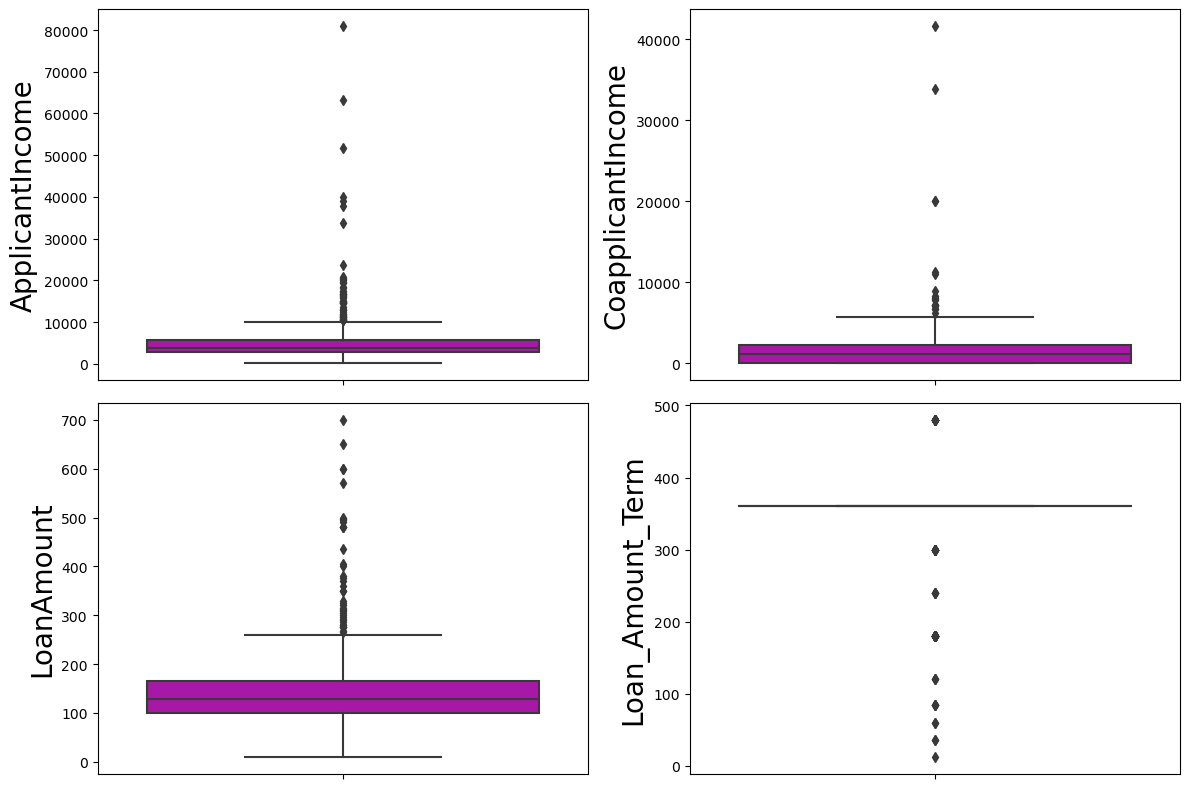

In [42]:
plt.figure(figsize=(12, 8), facecolor='white')
plotnumber = 1

for column in Numerical:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(y=df[column], color='m')
        plt.ylabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

From Boxplot we can see outliers exist dataset.

In [43]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [44]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [45]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


Data Loss

In [46]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((614-577)/614)*100,'%')

Percentage Data Loss : 6.026058631921824 %


6.0260% of the data loss is acceptable.

# Skewness of features

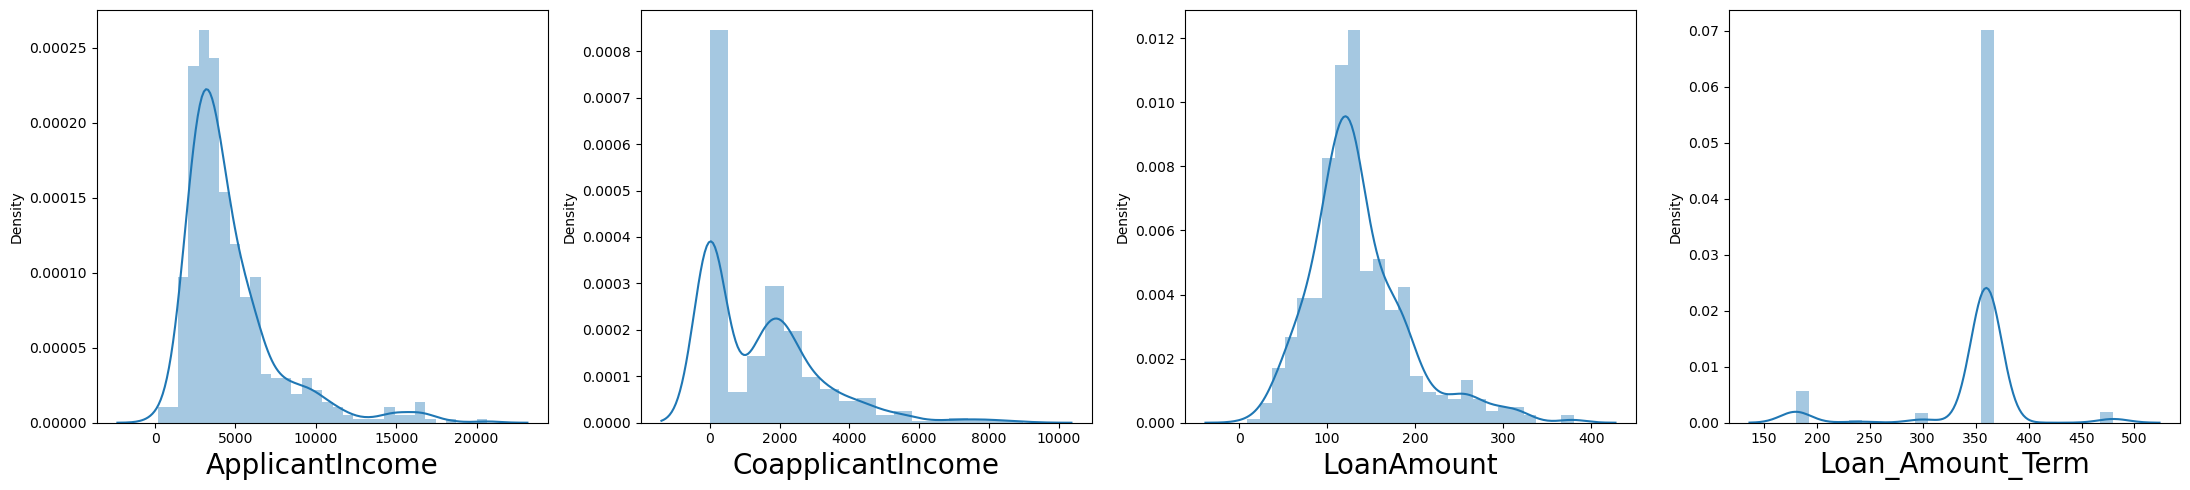

In [47]:
plt.figure(figsize=(22,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=4:
        plt.subplot(1,4,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [48]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

The numerical features "ApplicantIncome," "CoapplicantIncome," and "LoanAmount" are skewed out of all the features mentioned above.

Skewness has nothing to do with the remaining features because they are categorical in nature.We're going to overlook them.

The yeo-johnson transformation method will be used.

In [49]:
# Removing skewness using yeo-johnson  method 
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [50]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [51]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Skewness for the numerical variable is within allowable bounds.

# Heatmap Corrleation

In [52]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


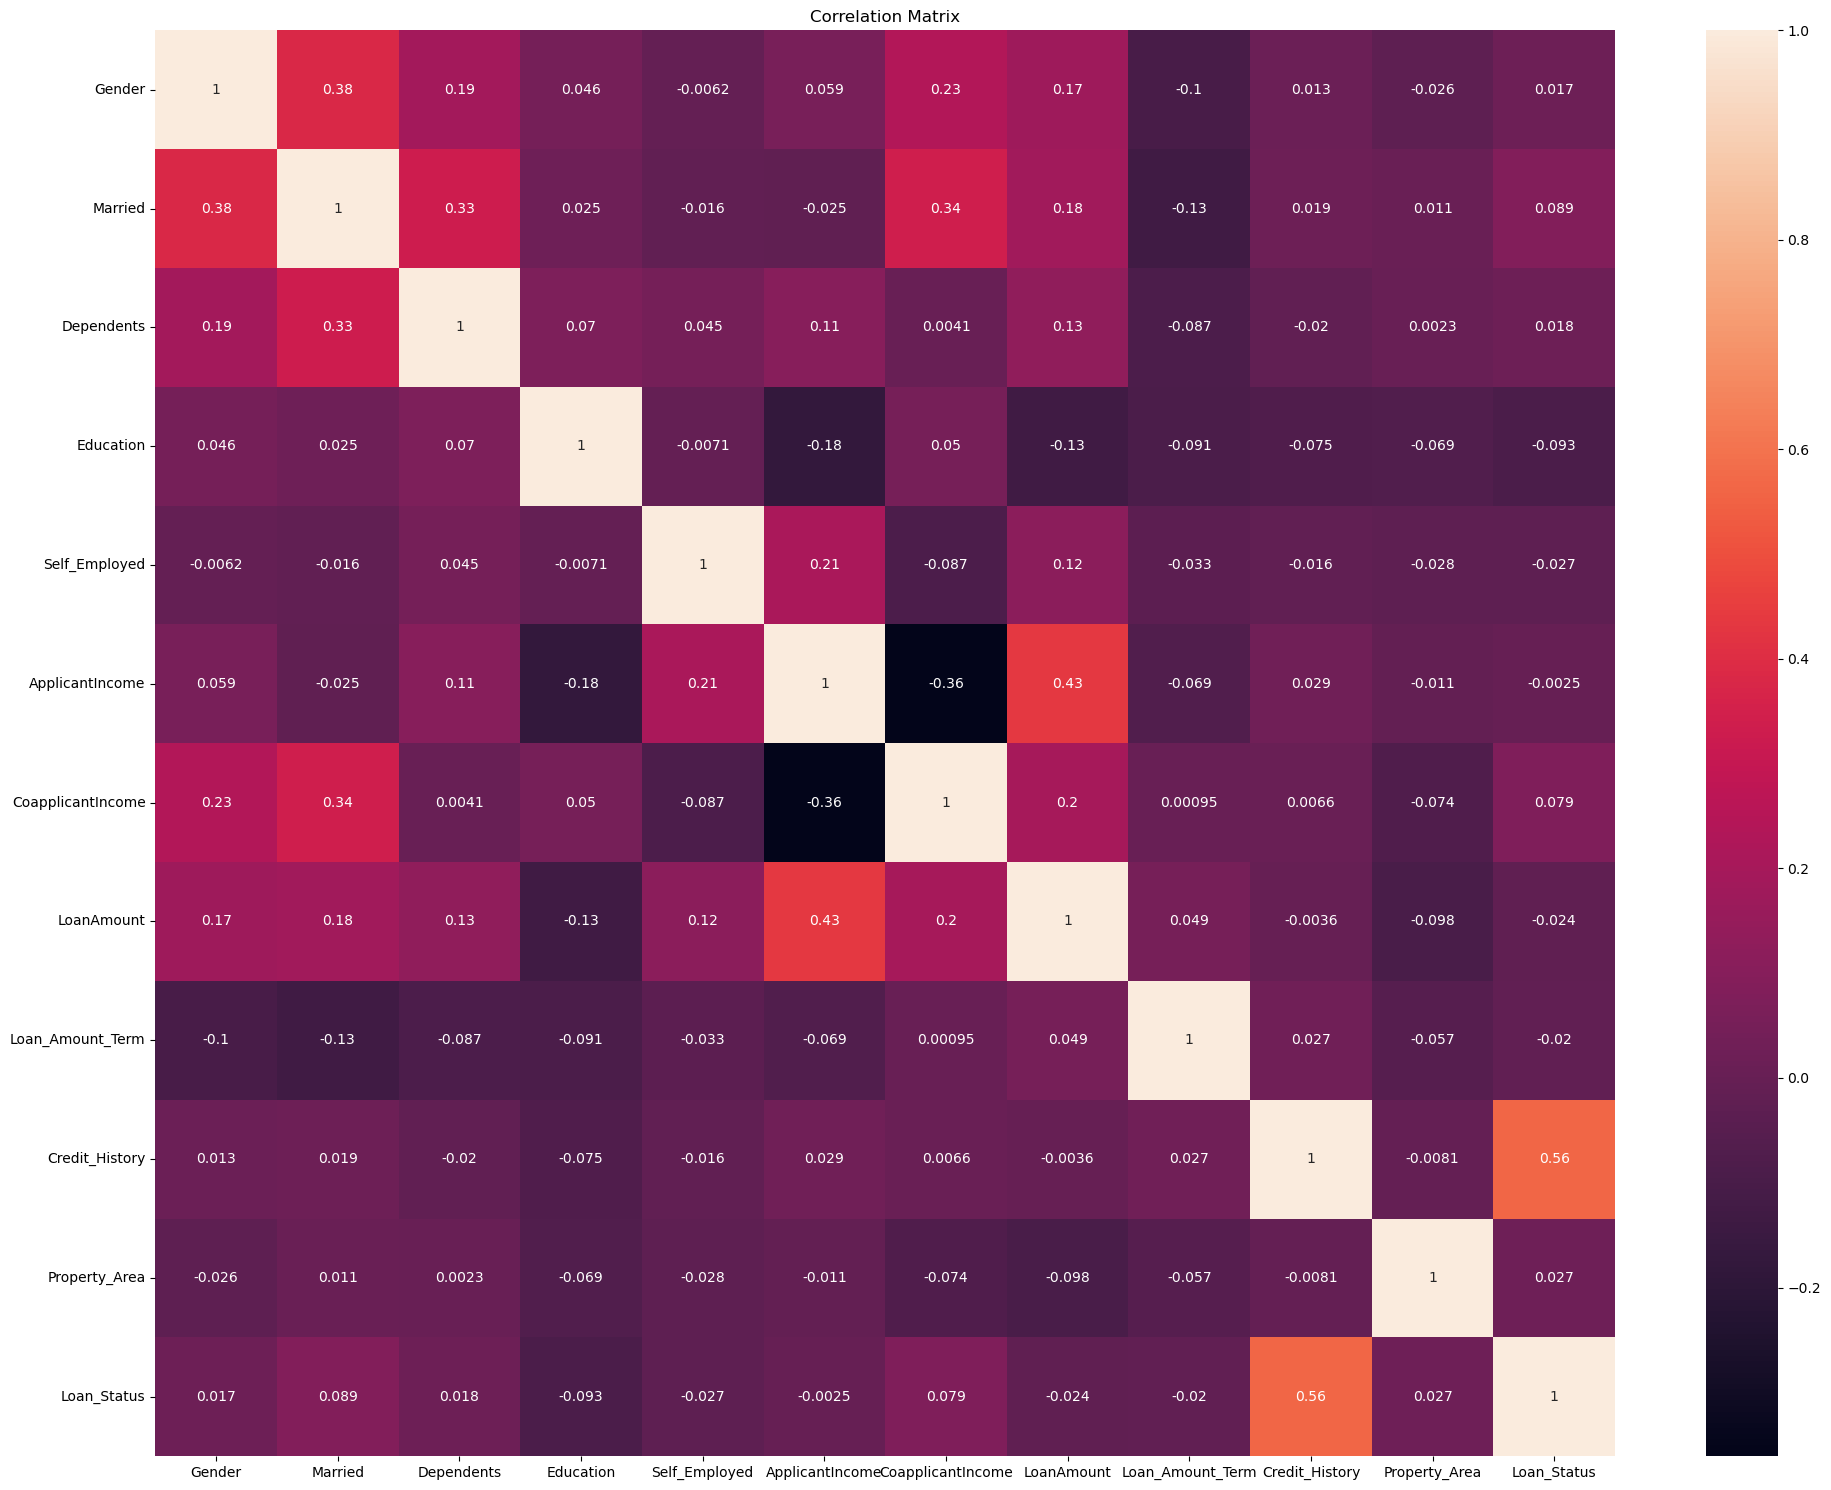

In [53]:
plt.figure(figsize = [20, 15])
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

Observation : 

From the above heatmap we can observe that credit history are highly corelated with target value loan status with .56

loan amount and applicant income are moderate positive corelated normal multicolinearity between them that does not impant on the data

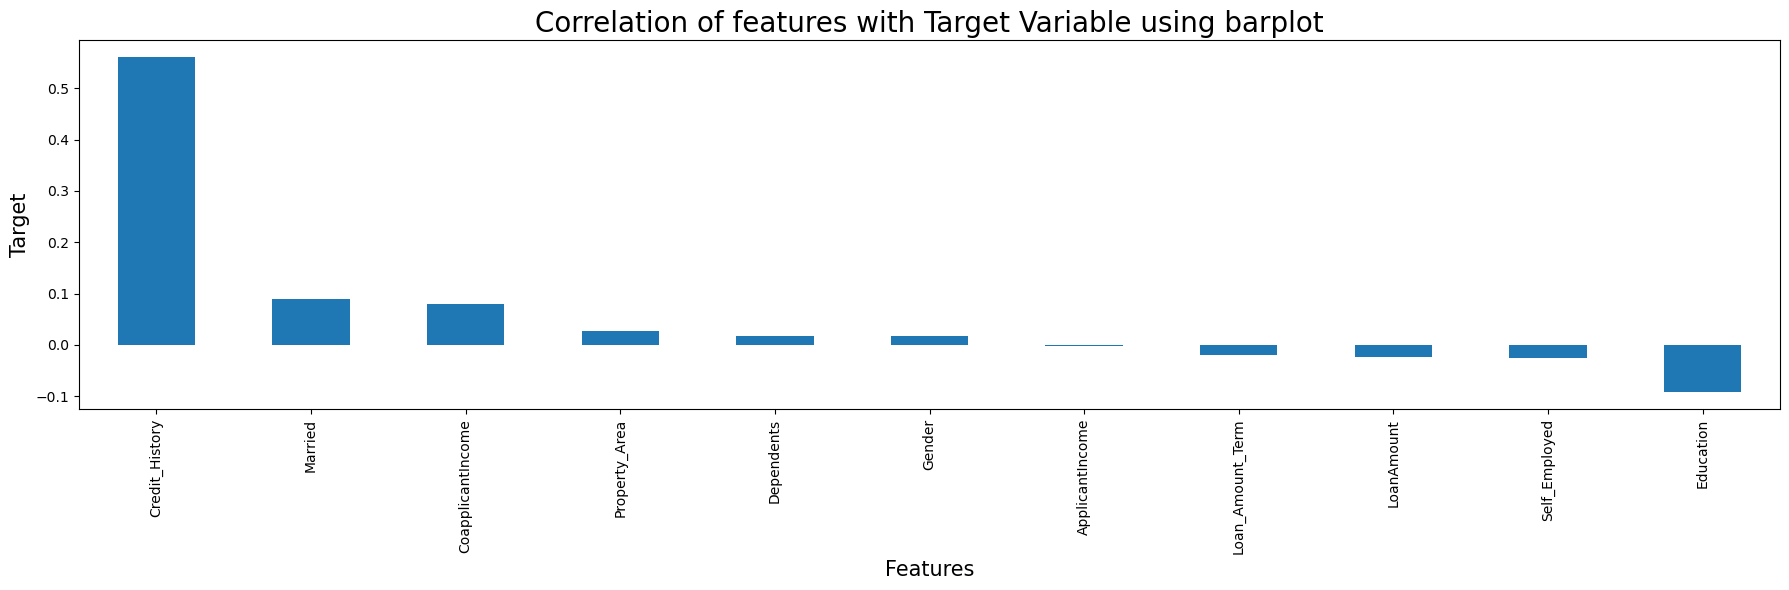

In [54]:
plt.figure(figsize = (18,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Correlation of features with Target Variable using barplot',fontsize = 20)
plt.show()

# Checking Multicollinearity between features using variance_inflation_factor

In [55]:

vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


All features VIF is within permissible limit of 10.

So No Need to Worry About Multicollinearity.

# Balanceing Imbalanced target feature

In [56]:
df.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [57]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [58]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [59]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

We successfully resolved the class imbalanced problem, and all of the categories now have the same data, ensuring that the ML model is not biased towards one category.

# Standard Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)

In [62]:
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (557, 11)
Training target vector size: (557,)
Test feature matrix size: (239, 11)
Test target vector size: (239,)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8242677824267782 on Random_state 78


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=78, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8242677824267782


Confusion matrix of Logistics Regression : 
 [[ 77  33]
 [  9 120]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       110
           1       0.78      0.93      0.85       129

    accuracy                           0.82       239
   macro avg       0.84      0.82      0.82       239
weighted avg       0.84      0.82      0.82       239



# Finding Optimal value of n_neighbors for KNN

In [65]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4664474480124446
RMSE value for k=  2 is: 0.513418276223035
RMSE value for k=  3 is: 0.4387124562248739
RMSE value for k=  4 is: 0.5215041008435626
RMSE value for k=  5 is: 0.4753329597178616
RMSE value for k=  6 is: 0.5294664560040351
RMSE value for k=  7 is: 0.4619406036915484
RMSE value for k=  8 is: 0.4883581921595791
RMSE value for k=  9 is: 0.4241654370544962
RMSE value for k=  10 is: 0.4664474480124446
RMSE value for k=  11 is: 0.4290692466374651
RMSE value for k=  12 is: 0.4527923591472056
RMSE value for k=  13 is: 0.41418367562569597
RMSE value for k=  14 is: 0.4619406036915484
RMSE value for k=  15 is: 0.4387124562248739
RMSE value for k=  16 is: 0.45738935374634826
RMSE value for k=  17 is: 0.4387124562248739
RMSE value for k=  18 is: 0.45738935374634826
RMSE value for k=  19 is: 0.43391764060527876
RMSE value for k=  20 is: 0.4527923591472056
RMSE value for k=  21 is: 0.41920426712191483
RMSE value for k=  22 is: 0.4387124562248739
RMSE value for 

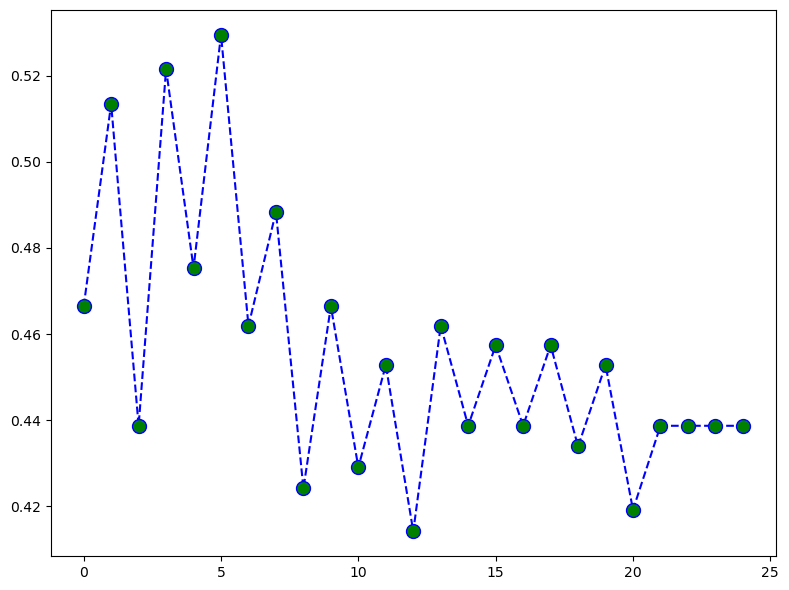

In [66]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(25), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

RMSE value for k=  13 is: 0.4141836756256959
    
we get the minimum RMSE value which approximately 0.4141836756256959, and shoots up on further increasing the k value. We can safely say that k=3 will give us the best result in this case.

# Applying other classification algorithm

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.799163179916318


Confusion matrix : 
 [[ 78  32]
 [ 16 113]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.71      0.76       110
           1       0.78      0.88      0.82       129

    accuracy                           0.80       239
   macro avg       0.80      0.79      0.79       239
weighted avg       0.80      0.80      0.80       239





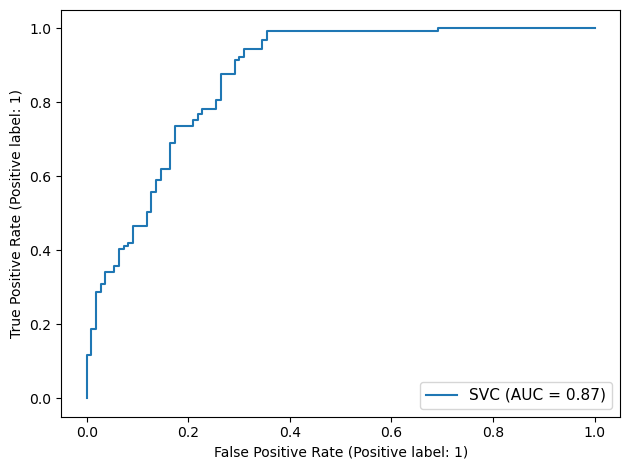

Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7740585774058577


Confusion matrix : 
 [[ 70  40]
 [ 14 115]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.64      0.72       110
           1       0.74      0.89      0.81       129

    accuracy                           0.77       239
   macro avg       0.79      0.76      0.77       239
weighted avg       0.78      0.77      0.77       239





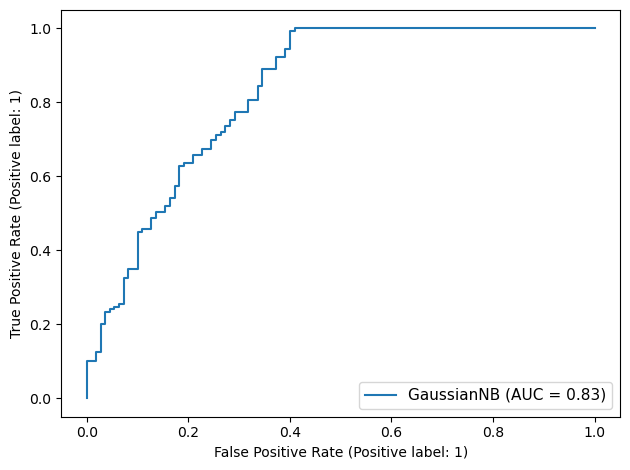

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.7615062761506276


Confusion matrix : 
 [[83 27]
 [30 99]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.79      0.77      0.78       129

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239





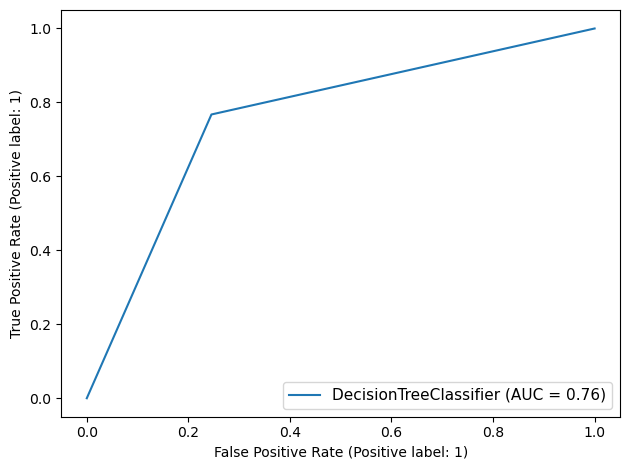

Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=13) is


Accuracy Score :
 0.8284518828451883


Confusion matrix : 
 [[ 86  24]
 [ 17 112]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.78      0.81       110
           1       0.82      0.87      0.85       129

    accuracy                           0.83       239
   macro avg       0.83      0.83      0.83       239
weighted avg       0.83      0.83      0.83       239





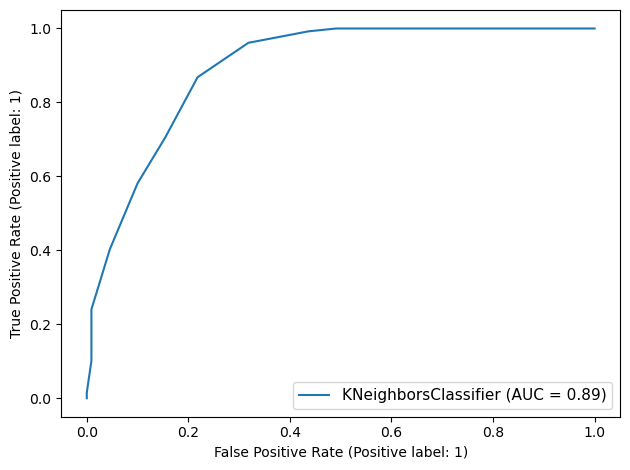

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.8410041841004184


Confusion matrix : 
 [[ 87  23]
 [ 15 114]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       110
           1       0.83      0.88      0.86       129

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239





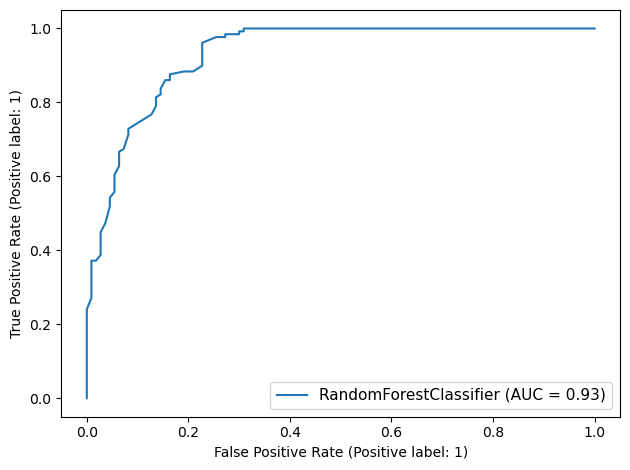

Classification ML Algorithm Evaluation Matrix ExtraTreesClassifier() is


Accuracy Score :
 0.8577405857740585


Confusion matrix : 
 [[ 90  20]
 [ 14 115]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84       110
           1       0.85      0.89      0.87       129

    accuracy                           0.86       239
   macro avg       0.86      0.85      0.86       239
weighted avg       0.86      0.86      0.86       239





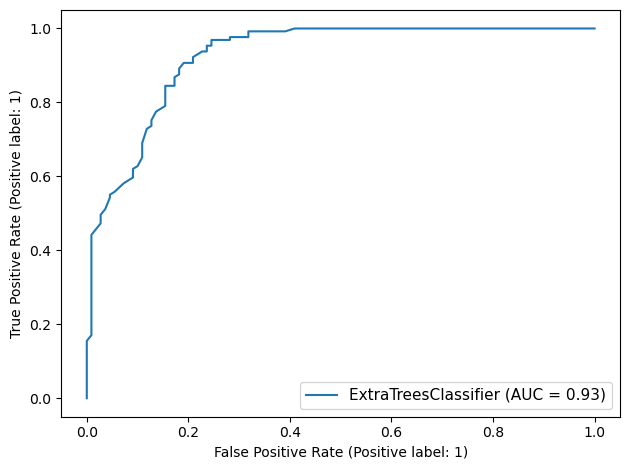

In [67]:
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model=[ 
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 13),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    disp = plot_roc_curve(m,X_test,Y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    print('===============================================')

# CrossValidation 

In [68]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 13),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('===============================')



Cross Validation Score LogisticRegression() :

Score : [0.675      0.70440252 0.77358491 0.81132075 0.72955975]
Mean Score : 0.7387735849056604
Std deviation : 0.04859682131873155




Cross Validation Score SVC() :

Score : [0.69375    0.74842767 0.79245283 0.7672956  0.74213836]
Mean Score : 0.748812893081761
Std deviation : 0.032627210698611686




Cross Validation Score GaussianNB() :

Score : [0.69375    0.71698113 0.77358491 0.80503145 0.75471698]
Mean Score : 0.7488128930817609
Std deviation : 0.039633873944472924




Cross Validation Score DecisionTreeClassifier() :

Score : [0.7125     0.71698113 0.79874214 0.78616352 0.75471698]
Mean Score : 0.7538207547169812
Std deviation : 0.0350124294892735




Cross Validation Score KNeighborsClassifier(n_neighbors=13) :

Score : [0.7        0.71069182 0.75471698 0.74213836 0.72327044]
Mean Score : 0.7261635220125785
Std deviation : 0.020013839600703225




Cross Validation Score RandomForestClassifier() :

Score : [0.8        0.7735849

As we can see, RandomForestClassifier() provides the best Cross-validation score, largest f1 score, and good accuracy. We will use the Random Forest model as our final model after applying hyperparameter adjustment.

# Hyper Parameter Tuning : GridSearchCV

In [69]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [70]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.688 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.679 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.703 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.685 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [71]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 60}

In [75]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators= 60, max_depth=10 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8535564853556485


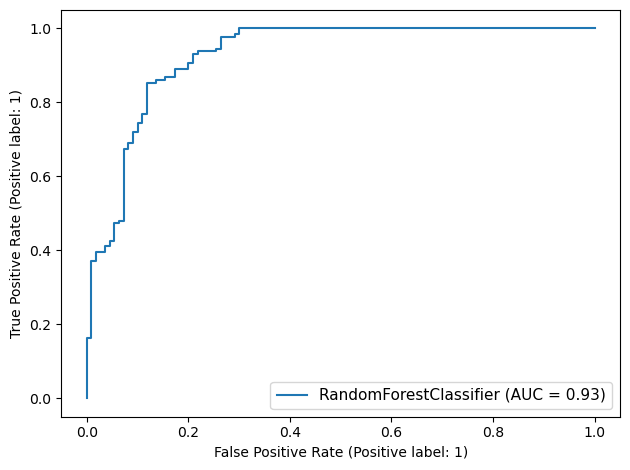

<Figure size 1000x1000 with 0 Axes>

Auc Score :
 0.8489429175475687


In [76]:
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.figure(figsize=(10,10))
plt.show()
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)


In [77]:
import joblib
joblib.dump(Final_mod,'Loan_Status_Final.pkl')

['Loan_Status_Final.pkl']